#Install the required Libraries

In [ ]:
!pip install tensorflow
!pip install scikeras
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


# Importing the required Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



#Here we read the csv using user input, We have a dataset of S&P 400 stocks, which has the code and name of the stock, User should enter the stock code after the prompt.

#We have saved numerical data in "StockCode Stockname.csv"

In [ ]:
def read_stock_csv():
  stock_mapping = pd.read_csv('/content/sample_data/stock_codes.csv')
  user_input = input("Enter the stock code (e.g., TSLA for Tesla): ")
  user_input = user_input.upper()
  print(type(user_input))
  stock_data = []
  # Check if the user input is valid
  if user_input.strip() in stock_mapping['Code'].str.strip().values:
      stock_name = stock_mapping.loc[stock_mapping['Code'].str.strip() == user_input.strip(), 'Name'].values[0]
      csv_file_path = f"/content/sample_data/{user_input} {stock_name}.csv"
      stock_data = pd.read_csv(csv_file_path)
      return stock_data, stock_name, user_input
      print("Data loaded successfully!")
  else:
      print("Invalid stock code!")




# Here we create the Action column, which has values buy and sell based on the numeric values of the dataset

Here 0 is sell and 1 is buy

In [ ]:
def action_of_stock(data,id):
  if id == 0:
      return None

  prev_row = data.iloc[id - 1]
  curr_row = data.iloc[id]

  prev_close = prev_row['Close']
  prev_volume = prev_row['Volume']
  close = curr_row['Close']
  volume = curr_row['Volume']
  open = curr_row['Open']
  if prev_close > open and prev_close > close and prev_volume > volume:
      return "Buy"  # Buy
  elif open > prev_close and prev_close < close and volume < prev_volume:
      return "Sell"  # Sell
  elif close>prev_close:
    return "Buy"
  else:
    return "Sell"


# Here we call the function to read the data and also the function to create the "Action" column

In [ ]:
# Load the dataset
data, stock_name, user_input = read_stock_csv()

# Create a new column 'Buy_or_Not' representing whether to buy or not buy the stock
data['Action'] = [action_of_stock(data, idx) for idx in range(len(data))]
# Drop the last row as it doesn't have a target value
data = data.dropna()

# Display the updated dataframe
print(data)


Enter the stock code (e.g., TSLA for Tesla): aapl
<class 'str'>
         Date   Open   High    Low  Close       Volume Action
1    5/2/2014  21.16  21.22  21.06  21.16  191514252.0    Buy
2    5/1/2014  21.14  21.24  20.94  21.12  244209661.0   Sell
3   4/30/2014  21.17  21.41  21.06  21.07  456883540.0   Sell
4   4/29/2014  21.21  21.29  21.05  21.15  337378733.0   Sell
5   4/28/2014  20.46  21.28  20.45  21.22  669486747.0    Buy
6   4/25/2014  20.16  20.43  20.14  20.43  390275155.0    Buy
7   4/24/2014  20.29  20.36  20.03  20.28  759912407.0   Sell
8   4/23/2014  18.90  18.97  18.73  18.74  394941075.0    Buy
9   4/22/2014  18.87  18.99  18.80  18.99  202657803.0   Sell
10  4/21/2014  18.76  19.01  18.71  18.97  182675716.0    Buy
11  4/17/2014  18.57  18.85  18.54  18.75  284426788.0   Sell
12  4/16/2014  18.50  18.61  18.36  18.54  214931967.0    Buy
13  4/15/2014  18.58  18.63  18.26  18.50  266490297.0   Sell
14  4/14/2014  18.64  18.65  18.47  18.63  205780699.0   Sell
15  4/

# Time Series Plot of Specific Stock

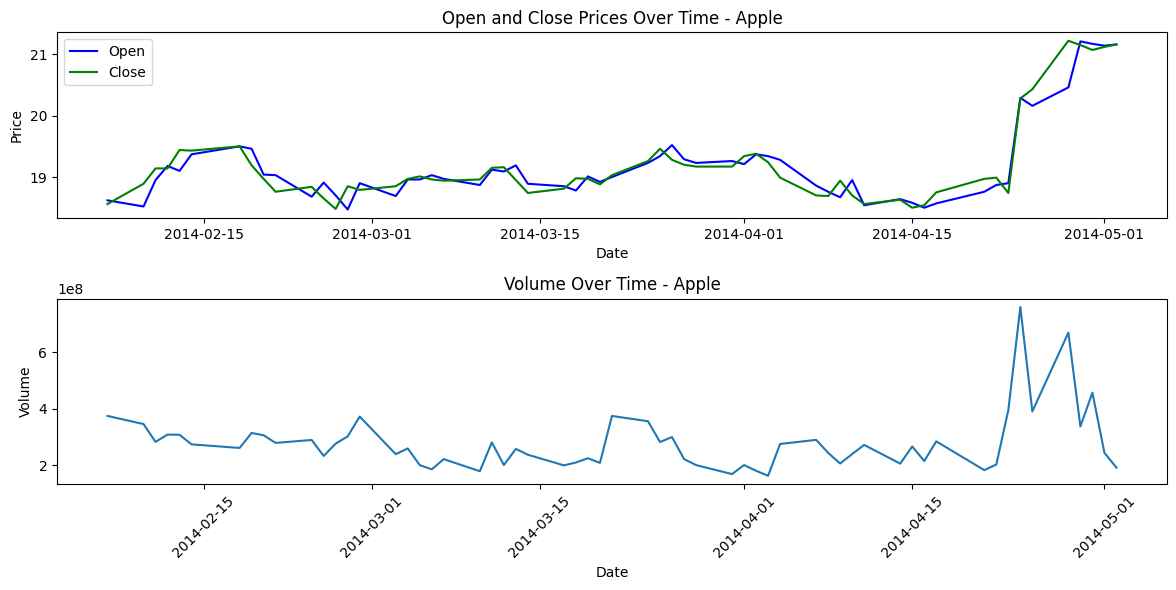

In [ ]:

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Plotting
plt.figure(figsize=(12, 6))

# Time Series Plot
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Open'], label='Open', color='blue')
plt.plot(data['Date'], data['Close'], label='Close', color='green')
plt.title(f'Open and Close Prices Over Time - {stock_name}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Volume Plot
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Volume'])
plt.title(f'Volume Over Time - {stock_name}')
plt.xlabel('Date')
plt.ylabel('Volume')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Candlestick Plot of Specific Stock

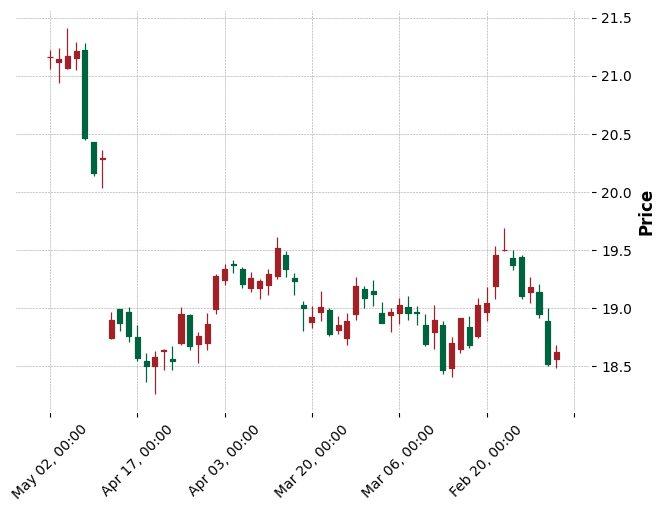

In [ ]:

# Convert columns to appropriate data types
data['Open'] = data['Open'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
data['Close'] = data['Close'].astype(float)

# Remove commas from the 'Volume' column and convert to int
data['Volume'] = data['Volume'].replace(',', '', regex=True).astype(int)

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plotting the candlestick chart
mpf.plot(data, type='candle', style='charles')


# Action Plot of Specific Stock

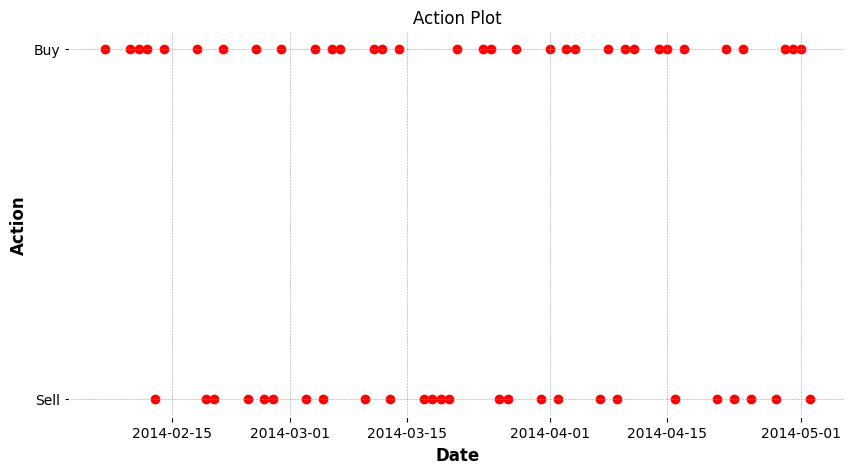

In [ ]:

# Ensure 'Date' is accessible as a column
data.reset_index(inplace=True)  # This moves 'Date' back to a column

plt.figure(figsize=(10, 5))
plt.scatter(data['Date'], data['Action'], color='red')
plt.title('Action Plot')
plt.xlabel('Date')
plt.ylabel('Action')
plt.yticks([0, 1], ['Sell', 'Buy'])
plt.grid(True)
plt.show()


#Here we define the features and target variable

In [ ]:
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Action'].values

#We scale the input to be in specific range of   values  and We scale the target variables using label encoding

In [ ]:

scaler = StandardScaler()
le = LabelEncoder()

X_scaled = scaler.fit_transform(X)
y_scaled = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=38)



# Model Definition, After checking with multiple hidden units, we have selected the following hidden units

In [19]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_scaled, y_scaled, epochs=50, batch_size=30)

predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)
label_predictions = ['Buy' if pred > 0.5 else 'Sell' for pred in predictions]



Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4045 - loss: 0.7178
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6066 - loss: 0.6865 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5729 - loss: 0.6796
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6288 - loss: 0.6761
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6066 - loss: 0.6730 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6407 - loss: 0.6747 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6738 - loss: 0.6533 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6292 - loss: 0.6672 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5844 - loss: 0.6616
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6290 - loss: 0.6496 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6403 - loss: 0.6537
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5959 - loss: 0.

#Predictions formed after labelling the binary predicitons

In [20]:
print(label_predictions)

['Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Buy', 'Buy', 'Sell', 'Sell', 'Sell', 'Sell', 'Buy']


# We have labelled the y_test in this model, make sure to label the data you are using to validate

In [21]:
labeled_y_test = ['Buy' if element == 1  else 'Sell' for element in y_test]


#Creating Confusion matrix and Classification Report

Accuracy: 0.7777777777777778
Confusion Matrix:
[[6 2]
 [2 8]]
Classification Report:
              precision    recall  f1-score   support

         Buy       0.80      0.80      0.80        10
        Sell       0.75      0.75      0.75         8

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



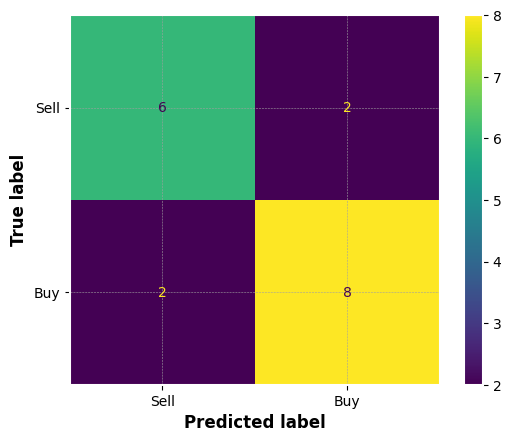

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy=accuracy_score(binary_predictions, y_test)
conf_matrix = confusion_matrix(label_predictions,labeled_y_test,labels=["Sell","Buy"])
classification_rep = classification_report(label_predictions,labeled_y_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Sell","Buy"])
disp.plot()
plt.show()


# Numeric Predictive Suggestion

In [23]:
if label_predictions.count('Buy') > label_predictions.count("Sell"):
  print("Buy the stocks")
else:
   print("Sell the stocks")



Buy the stocks


#Saving the model

In [24]:
model.save('binary_model.h5')

# ROC-CURVE

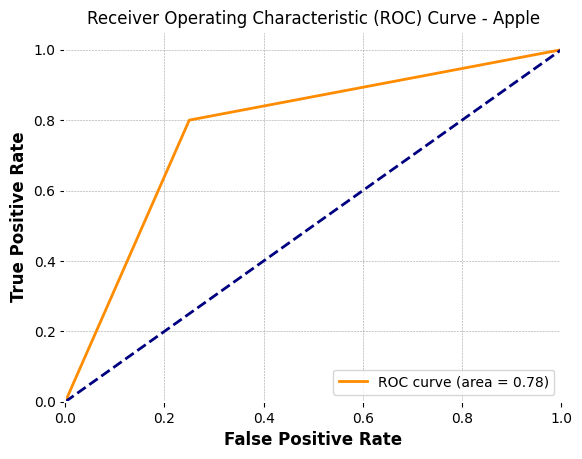

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - {stock_name}')
plt.legend(loc="lower right")
plt.show()

#Reading the Predictions of text data that we have used in DistilBertSequenceClassifier

In [26]:
def read_text_predictions(user_input):
      csv_file_path = f"/content/sample_data/{user_input} predictions.csv"  # Assuming the CSV files are saved based on the stock name / Replace with file name as of your predictions
      text_Data = pd.read_csv(csv_file_path)
      return text_Data



#Creating the Action Column in the dataframe with the respective sentiments of the predictions

In [27]:
tData = read_text_predictions(user_input)
def suggestionConversion(value):
  if value == "Bearish" or value == "Neutral":
    return "Sell"
  else:
    return "Buy"

# Apply the function to the column
tData['Sentiment'] = tData['Sentiment'].apply(suggestionConversion)
tData['Action'] = tData['Sentiment']
tData = tData.drop(columns=['Sentiment'])

tData

,Date,text,Code,Action
0,5/5/2014,apple raises dividend more than expected 0.52 ...,AAPL,Buy
1,5/2/2014,1 billion devices 0.92device 1 trillion in a...,AAPL,Sell
2,5/1/2014,and then 20000 731 131strike calls cross on ap...,AAPL,Sell
3,4/30/2014,apple shares fell 0.10 to 93.65. its the 8thst...,AAPL,Sell
4,4/29/2014,why pay 0.99 for a 2 pencil when you can pay 9...,AAPL,Sell
5,4/28/2014,the smartflash patent troll which won 0.5 bn a...,AAPL,Sell
6,4/25/2014,not so bad today 5 wins1 loss 83 profitabilit...,AAPL,Sell
7,4/24/2014,todays trades contnew aapl selling the jan ...,AAPL,Sell
8,4/23/2014,apple declares 0.47 dividend aapl,AAPL,Sell
9,4/22/2014,apple declares 0.47 dividend aapl,AAPL,Sell


# Tweet Based Stock Suggestion

In [29]:
action_counts = tData['Action'].value_counts()

if action_counts["Buy"] == action_counts["Sell"]:
  print("Hold the Stock")
elif action_counts["Buy"] > action_counts["Sell"]:
  print("Buy the Stock")
else:
   print("Sell the stocks")


Buy the stocks
